In [202]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [203]:
X, y = make_moons()

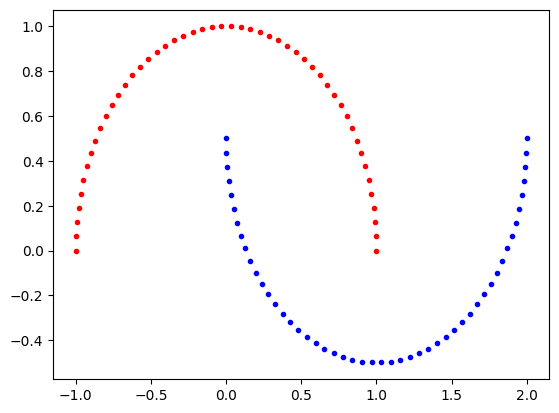

In [204]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], ".", color="blue")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], ".", color="red")

In [205]:
X.shape

(100, 2)

In [206]:
y.shape

(100,)

In [207]:
X[:3]

array([[ 1.8380881 , -0.0455349 ],
       [ 1.6234898 , -0.28183148],
       [ 1.09602303, -0.49537911]])

In [208]:
y[:3]

array([1, 1, 1])

In [209]:
gini_node(np.array([1,1,1,1,1,1,0,0,0,0]))

0.48

In [210]:
gini_split(np.array([1]),np.array([1,1,1,1,1,0,0,0,0]))

0.4444444444444444

In [211]:
test_X = X[:3]
test_y = y[:3]
print(test_X, test_y)

[[ 1.8380881  -0.0455349 ]
 [ 1.6234898  -0.28183148]
 [ 1.09602303 -0.49537911]] [1 1 1]


In [212]:
sort_X_y_by_one_feature(test_X, test_y,0)

(array([[ 1.09602303, -0.49537911],
        [ 1.6234898 , -0.28183148],
        [ 1.8380881 , -0.0455349 ]]),
 array([1, 1, 1]))

In [213]:
def gini_node(y):
    # return the gini score of a Node based on y (classes)
    sum = 0
    y = list(y)
    classes = list(set(y))
    for c in classes:
        sum += (y.count(c)/len(y))**2
    return 1 - sum

def gini_split(y_left, y_right):
    # return the gini score of a split
    len_parent_node = len(y_left) + len(y_right)
    return (len(y_left)/len_parent_node)*gini_node(y_left) + (len(y_right)/len_parent_node)*gini_node(y_right)

def sort_X_y_by_one_feature(X, y, idx_feature):
    # return X and y sorted by one feature
    # idx_feature is the index of the feature in X
    inds = X[:,idx_feature].argsort()
    return X[inds], y[inds]

def get_childs(X, y,func):
    # return child Nodes of the Node
    best_split = None
    min_gini_split = np.inf
    feature_selected_split = None
    
    nb_features = X.shape[1]
    for idx_feature in range(nb_features):
        X, y = sort_X_y_by_one_feature(X, y, idx_feature)
        
        for i in range(1,len(X)):
            X_left, y_left = X[:i], y[:i]
            X_right, y_right = X[i:], y[i:]
            
            gini_split_value = func(y_left, y_right)
            if gini_split_value < min_gini_split:
                best_split = (X_left, y_left, X_right, y_right)
                min_gini_split = gini_split_value
                feature_selected_split = idx_feature
    
    best_X_left, best_y_left = best_split[0], best_split[1]
    best_X_right, best_y_right = best_split[2], best_split[3]
    left_child = Node(best_X_left, best_y_left)
    print(left_child.X[-1][feature_selected_split])
    right_child = Node(best_X_right, best_y_right)
        
    return left_child, right_child

In [214]:
# test avec exo td
td_X = np.array([[6.7,3.3],[6.7,3],[6.3,2.5],[6.5,3],[6.2,3.4],[5.9,3],[6.1,2.8],[6.4,2.9],[6.6,3],[6.8,2.8]])
td_y = np.array([1,1,1,1,1,1,0,0,0,0])

left_node, right_node = get_childs(td_X, td_y,func=gini_split)
print("left : ",left_node.X)
print("right : ",right_node.X)

2.9
left :  [[6.3 2.5]
 [6.1 2.8]
 [6.8 2.8]
 [6.4 2.9]]
right :  [[5.9 3. ]
 [6.5 3. ]
 [6.6 3. ]
 [6.7 3. ]
 [6.7 3.3]
 [6.2 3.4]]


In [215]:
class Node:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.LeftChildNode = None
        self.RightChildNode = None
        self.depth = None
        
    def split(self,func=gini_split,max_depth=5):
        # split the Node recursively until the maximum depth is obtained
        # func is the cost function used for the split
        # do we need to split when the y is full of only one class ? i guess no
        if gini_node(self.y) > 0:
            self.LeftChildNode, self.RightChildNode = get_childs(self.X, self.y, func)
            self.LeftChildNode.depth = self.depth + 1
            self.RightChildNode.depth = self.depth + 1
        
            # split again until the maximum depth
            if (self.LeftChildNode.depth < max_depth) and (self.RightChildNode.depth < max_depth):
                self.LeftChildNode.split(func,max_depth)
                self.RightChildNode.split(func,max_depth)

class DecisionTree:
    def __init__(self, task="classification", max_depth=5):
        # task can be either "regression" xor "classification"
        self.task = task
        self.max_depth = max_depth
        self.root = None
        
    def fit(self, X, y):
        # return the constructed decision tree
        if self.task == "classification":
            func = gini_split
            
        self.root = Node(X, y)
        self.root.depth = 0
        self.root.split(func,self.max_depth)
        
        return self.root
    
    def predict(self, X):
        # return the prediction on X
        return False

In [217]:
clf = DecisionTree(task="classification",max_depth=5)
root = clf.fit(td_X,td_y)

2.9
2.5
6.5
6.6


In [218]:
print(root.y)

[1 1 1 1 1 1 0 0 0 0]


In [219]:
print(root.LeftChildNode.y, root.RightChildNode.y)

[1 0 0 0] [1 1 0 1 1 1]


In [220]:
print(root.LeftChildNode.LeftChildNode.y, root.LeftChildNode.RightChildNode.y, root.RightChildNode.LeftChildNode.y, root.RightChildNode.RightChildNode.y)

[1] [0 0 0] [1 1 1] [0 1 1]
